In [15]:
using VegaLite: @vlplot

In [2]:
h = {"px2:q", scale = {domain = [-2, 2]}}

LoadError: syntax: { } vector syntax is discontinued around In[2]:1

In [16]:
using VegaDatasets

In [17]:
data = dataset("cars")

Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
"""chevrolet chevelle malibu""",18.0,8,307.0,130,3504,12.0,"""1970-01-01""","""USA"""
"""buick skylark 320""",15.0,8,350.0,165,3693,11.5,"""1970-01-01""","""USA"""
"""plymouth satellite""",18.0,8,318.0,150,3436,11.0,"""1970-01-01""","""USA"""
"""amc rebel sst""",16.0,8,304.0,150,3433,12.0,"""1970-01-01""","""USA"""
"""ford torino""",17.0,8,302.0,140,3449,10.5,"""1970-01-01""","""USA"""
"""ford galaxie 500""",15.0,8,429.0,198,4341,10.0,"""1970-01-01""","""USA"""
"""chevrolet impala""",14.0,8,454.0,220,4354,9.0,"""1970-01-01""","""USA"""
"""plymouth fury iii""",14.0,8,440.0,215,4312,8.5,"""1970-01-01""","""USA"""
"""pontiac catalina""",14.0,8,455.0,225,4425,10.0,"""1970-01-01""","""USA"""
"""amc ambassador dpl""",15.0,8,390.0,190,3850,8.5,"""1970-01-01""","""USA"""


In [19]:
data |> @vlplot(:point)

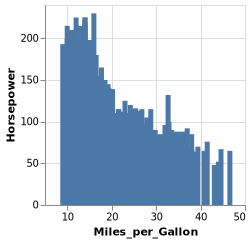

In [23]:
data |> @vlplot(:bar, x=:Miles_per_Gallon, y=:Horsepower)

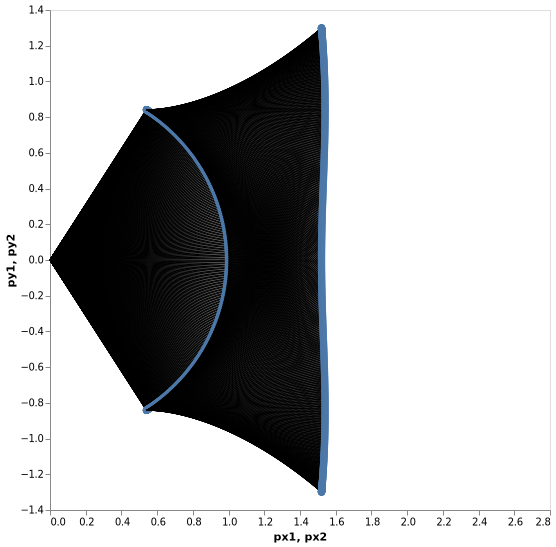

In [25]:
arm_motion_data = [(; ϕ1 = cos(t), ϕ2 = sin(t), t) for t in 0:0.01:2pi]

arm_motion_data |>
VegaLite.@vlplot(
    width = 500,
    height = 500,
    transform = [
        {calculate = "cos(datum.ϕ1)", as = "px1"},
        {calculate = "sin(datum.ϕ1)", as = "py1"},
        {calculate = "datum.px1 + cos(datum.ϕ2)", as = "px2"},
        {calculate = "datum.py1 + sin(datum.ϕ2)", as = "py2"},
    ],
) +
VegaLite.@vlplot(
    mark = :rule,
    x = {datum = 0, scale = {domain = [0, 2.8]}},
    y = {datum = 0, scale = {domain = [-1.4, 1.4]}},
    x2 = "px1:q",
    y2 = "py1:q"
) +
VegaLite.@vlplot(mark = :point, x = "px1:q", y = "py1:q") +
VegaLite.@vlplot(mark = :rule, x = "px1:q", y = "py1:q", x2 = "px2:q", y2 = "py2:q") +
VegaLite.@vlplot(mark = :point, x = "px2:q", y = "py2:q")